In [3]:
import skimage.io
import skimage.feature
from skimage import data
import matplotlib.pyplot as plt

from skimage.feature import graycomatrix, graycoprops
from skimage import io
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
import skimage.io as io
import skimage as sk
from skimage import measure
import math
from math import sqrt
from skimage import io, color
from skimage.feature import graycomatrix, graycoprops
from sklearn.metrics.cluster import entropy
from scipy.stats import skew, kurtosis

from numpy import asarray
from PIL import Image

import math
from math import sqrt

import skimage as sk
from skimage import measure

from numpy import asarray
from PIL import Image
import math
from math import sqrt

import skimage as sk
from skimage import measure

from numpy import asarray
from PIL import Image

import numpy as np
from skimage import io, color
from skimage.util import img_as_ubyte
from skimage.feature import graycomatrix, graycoprops
from sklearn.metrics.cluster import entropy

import scipy
import cv2
from scipy.stats import skew, kurtosis
import skimage
from skimage.feature import local_binary_pattern, graycomatrix, graycoprops
from skimage.filters import gabor
from PIL import ImageStat

In [ ]:
import os
import pandas as pd
from skimage import io, measure, feature, filters
# from skimage.feature import greycomatrix, greycoprops
from skimage.filters import gabor
import numpy as np

# Define function to extract features from an image
def extract_features(image_path):
    # Read the image
    image = io.imread(image_path, as_gray=True)

    # Extract region properties
    props = measure.regionprops(measure.label(image))

    # Initialize feature dictionary
    features = {}

    # Calculate basic region properties
    features['Area'] = props[0].area
    features['PA_ratio'] = props[0].perimeter / props[0].area
    features['Solidity'] = props[0].solidity
    features['Circularity'] = 4 * np.pi * props[0].area / props[0].perimeter ** 2
    features['EquivDiameter'] = props[0].equivalent_diameter
    features['ConvexArea'] = props[0].convex_area
    features['Extent'] = props[0].extent
    features['FilledArea'] = props[0].filled_area
    features['Major axis length'] = props[0].major_axis_length
    features['Minor axis length'] = props[0].minor_axis_length

    # Calculate intensity features
    features['Mean'] = np.mean(image)
    features['Standard Deviation'] = np.std(image)
    features['Shannon_Entropy'] = filters.rank.entropy(image, np.ones((3,3)))

    # Calculate GLCM features
    #glcm = greycomatrix(image.astype(np.uint8), [1], [0], levels=256, symmetric=True, normed=True)
    #features['Glcm_entropy'] = greycoprops(glcm, 'entropy')[0, 0]

    # Calculate LBP features
    lbp = feature.local_binary_pattern(image, 8, 1, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 8 + 3), range=(0, 8 + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    features['lbp_energy'] = (hist ** 2).sum()
    features['lbp_entropy'] = -(hist * np.log2(hist + 1e-7)).sum()

    # Calculate Gabor features
    gabor_filt_real, gabor_filt_imag = gabor(image, frequency=0.6)
    features['gabor_energy'] = (gabor_filt_real * 2 + gabor_filt_imag * 2).sum()
    features['gabor_entropy'] = -(gabor_filt_real * np.log2(gabor_filt_real + 1e-7)).sum()

    # Calculate texture features
    co_matrix = feature.graycomatrix(image.astype(np.uint8), distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    features['correlation'] = feature.graycoprops(co_matrix, 'correlation')[0, 0]
    features['dissimilarity'] = feature.graycoprops(co_matrix, 'dissimilarity')[0, 0]
    features['homogeneity'] = feature.graycoprops(co_matrix, 'homogeneity')[0, 0]
    features['contrast'] = feature.graycoprops(co_matrix, 'contrast')[0, 0]
    features['energy'] = feature.graycoprops(co_matrix, 'energy')[0, 0]

    # Add brightness feature
    features['brightness'] = np.mean(image)

    return features

# Define folder containing images
folder_path = "/content/drive/MyDrive/Predicted Segmentation/Visual N"

# Initialize list to store features
all_features = []

# Loop through images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"): # Adjust based on your image types
        image_path = os.path.join(folder_path, filename)
        features = extract_features(image_path)
        features['Image'] = filename # Add image filename as a feature
        all_features.append(features)

# Convert features to DataFrame
df = pd.DataFrame(all_features)

# Save DataFrame to CSV
df.to_csv('/content/drive/MyDrive/Predicted Segmentation/Visual_N.csv', index=False)

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

In [ ]:
import cv2

# Load the image
image = cv2.imread('/content/drive/MyDrive/output/image_212_axial_slice_11_aug_0.png')

# Get the dimensions
height, width, channels = image.shape

print("Image dimensions (height, width, channels):", height, width, channels)


Image dimensions (height, width, channels): 256 256 3


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#############give directory


dirr1= r"C:\Users\DCL\OneDrive\Documents\others\sayma\blood cell\all_seg\NEUTROPHIL"
 #### source folder

csv=r"C:\Users\DCL\OneDrive\Documents\others\sayma\blood cell\all_seg/NEUTROPHIL.csv"
 ### csv save path
### must change csv path

c=3 ### c=class 1=0 or class 2=1

#####################################################################################################



black=0
j=0
df1 = pd.DataFrame(columns=['class', 'Area', 'PA_ratio', 'Solidity', 'Circularity', 'EquivDiameter', 'ConvexArea',
                            'Extent', 'FilledArea', 'Major axis length', 'Minor axis length', 'Mean', 'Standard Deviation',
                            'Shannon_Entropy', 'Glcm_entropy', 'Skewness', 'kurtosis','lbp_energy','lbp_entropy','gabor_energy',
                            'gabor_entropy', 'correlation','dissimilarity','homogeneity','contrast','energy','brightness'])

import os
onlyfiles = next(os.walk(dirr1))[2] #dir is your directory path as string
print(len(onlyfiles))



for i in os.listdir(dirr1):
    path = os.path.join(dirr1,i)
    im = io.imread(path)
    height = im.shape[0]
    width = im.shape[1]
    print('working on img ',i)
    props=sk.measure.regionprops(im)


    if len(props)!=0:
        pr=[]
        for prop in props:
            pr.append(prop.area)
        num = np.array(pr)
        a=props[np.argmax(num)]

        imgcv = cv2.imread(path)
        gray = cv2.cvtColor(imgcv,cv2.COLOR_BGR2GRAY)
        ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        ave = cv2.mean(thresh)[0]/255
        area = ave*height*width###########################
        try:
            image=skimage.io.imread(path,as_gray=True)
            thresh = threshold_otsu(image)
            binary = image > thresh
            perimeter=measure.perimeter(binary)################


            PA_ratio=round(perimeter/area,4)
            EquivDiameter=round(sqrt(4*area/math.pi),4)
            Circularity=round((4*area*math.pi)/(perimeter*perimeter),4)
            ConvexArea=round(a.convex_area,4)

        except:

            print('black found \n')
            black+=1

            continue

        Extent=round(a.extent,4)
        Solidity=round(area/ConvexArea,4)
        FilledArea=round(a.filled_area,4)
        maj_ax_le=round(a.major_axis_length,4)
        min_ax_le=round(a.minor_axis_length,4)
        #LS_ratio=round(maj_ax_le/min_ax_le,4)
        EulerNumber=round(a.euler_number,4)



        image=Image.open(path)
        i = image.convert('L')
        stat = ImageStat.Stat(i)
        brightness = stat.mean[0]
        pixels=asarray(image)
        # convert from integers to floats
        pixels=pixels.astype('float32')
        # calculate global mean
        mean=round(pixels.mean(),3)

        pixels=asarray(image)
        # convert from integers to floats
        pixels=pixels.astype('float32')
        # calculate global mean and standard deviation
        std=round(pixels.std(),3)

        #print('Standard Deviation: %.3f' % (std))
        sha_entropy=round(skimage.measure.shannon_entropy(image),4)

        #LBP & Gabor
        img_gray = image.convert('L')
        img_arr = np.array(img_gray)
        feat_lbp = local_binary_pattern(img_arr,8,1,'uniform') #Radius = 1, No. of neighbours = 8
        feat_lbp = np.uint8((feat_lbp/feat_lbp.max())*255)
        lbp_hist,_ = np.histogram(feat_lbp,8)
        lbp_hist = np.array(lbp_hist,dtype=float)
        lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
        lbp_energy = np.sum(lbp_prob**2)
        lbp_entropy = -np.sum(np.multiply(lbp_prob,np.log2(lbp_prob)))

        gaborFilt_real,gaborFilt_imag = gabor(img_arr,frequency=0.6)
        gaborFilt = (gaborFilt_real**2+gaborFilt_imag**2)//2
        gabor_hist,_ = np.histogram(gaborFilt,8)
        gabor_hist = np.array(gabor_hist,dtype=float)
        gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
        gabor_energy = np.sum(gabor_prob**2)
        gabor_entropy = -np.sum(np.multiply(gabor_prob,np.log2(gabor_prob)))

        rgbImg=io.imread(path)
        grayImg=img_as_ubyte(color.rgb2gray(rgbImg))
        distances=[1,2,3]
        angles=[0,np.pi/4,np.pi/2,3*np.pi/4]
        properties=['energy','homogeneity']
        glcm=skimage.feature.graycomatrix(grayImg,distances=distances,angles=angles,symmetric=True,normed=True)
        glcm_entropy=round(-np.sum(glcm*np.log2(glcm+(glcm==0))),4)


        im=cv2.imread(path)
        colon_number=0
        Skewness=round(skew(im.reshape(-1,3)[:,colon_number]),4)
        Kurtosis=round(kurtosis(im.reshape(-1,3)[:,colon_number]),4)


        imm=cv2.imread(path,0)
        glcm = graycomatrix(imm,[1],[0])
        correlation = graycoprops(glcm,'correlation')[0]
        dissimilarity = graycoprops(glcm,'dissimilarity')[0]
        homogeneity = graycoprops(glcm,'homogeneity')[0]
        contrast = graycoprops(glcm,'contrast')[0]
        energy = graycoprops(glcm,'energy')[0]
        #df1.loc[j] =list(area)+list(PA_ratio)+list(Solidity)+list(Circularity)+list(EquivDiameter)+list(ConvexArea)+list(Extent)+list(FilledArea)+list(maj_ax_le)+list(min_ax_le)+list(mean)+list(std)+list(sha_entropy)+list(glcm_entropy)+list(Skewness)+list(Kurtosis)
        df1.loc[j]=({'class':c,'Area':area,
                          'PA_ratio':PA_ratio,
                          'Solidity':Solidity,
                          'Circularity':Circularity,
                          'EquivDiameter':EquivDiameter,
                          'ConvexArea':ConvexArea,
                          'Extent':Extent,
                          'FilledArea':FilledArea,
                          'Major axis length':maj_ax_le,
                          'Minor axis length':min_ax_le,
                          #'LS_ Ratio':[LS_ratio],
                          'Mean':mean,
                          'Standard Deviation':std,
                          'Shannon_Entropy':sha_entropy,
                          'Glcm_entropy':glcm_entropy,
                          'Skewness':Skewness,
                          'kurtosis':Kurtosis,
                          'lbp_energy':lbp_energy,
                          'lbp_entropy':lbp_entropy,
                          'gabor_energy':gabor_energy,
                          'gabor_entropy':gabor_entropy,
                          'correlation': correlation,
                          'dissimilarity':dissimilarity,
                          'homogeneity':homogeneity,
                          'contrast':contrast,
                          'energy':energy,
                          'brightness':brightness})

        j+=1
    else:
        print('black found \n')
        black+=1
    print('\n')

print('\n\n\n')
print('black images found: ',black, 'out of total image : ',len(onlyfiles), )
print('\n\n\n\n\n\n')
print(brightness)



frames = df1


############################################### give directy to save csv file

#roidata_set = pd.concat(frames)
frames.to_csv(csv,index=False)### give train.csv path
#print(frames)

###############################################################################


######## after completing train set give me an ss of the output that will be printed below... do the same for val and test also.


3123
working on img  NEUTROPHIL 0.png


working on img  NEUTROPHIL 1.png
black found 

working on img  NEUTROPHIL 10.png


working on img  NEUTROPHIL 100.png


working on img  NEUTROPHIL 1000.png


working on img  NEUTROPHIL 1001.png


working on img  NEUTROPHIL 1002.png


working on img  NEUTROPHIL 1003.png


working on img  NEUTROPHIL 1004.png


working on img  NEUTROPHIL 1005.png
black found 

working on img  NEUTROPHIL 1006.png


working on img  NEUTROPHIL 1007.png


working on img  NEUTROPHIL 1008.png


working on img  NEUTROPHIL 1009.png


working on img  NEUTROPHIL 101.png


working on img  NEUTROPHIL 1010.png


working on img  NEUTROPHIL 1011.png
black found 

working on img  NEUTROPHIL 1012.png


working on img  NEUTROPHIL 1013.png
black found 

working on img  NEUTROPHIL 1014.png
black found 

working on img  NEUTROPHIL 1015.png


working on img  NEUTROPHIL 1016.png
black found 

working on img  NEUTROPHIL 1017.png


working on img  NEUTROPHIL 1018.png


working on img  NEUTR

working on img  NEUTROPHIL 1171.png


working on img  NEUTROPHIL 1172.png


working on img  NEUTROPHIL 1173.png


working on img  NEUTROPHIL 1174.png


working on img  NEUTROPHIL 1175.png


working on img  NEUTROPHIL 1176.png
black found 

working on img  NEUTROPHIL 1177.png


working on img  NEUTROPHIL 1178.png


working on img  NEUTROPHIL 1179.png


working on img  NEUTROPHIL 118.png


working on img  NEUTROPHIL 1180.png


working on img  NEUTROPHIL 1181.png
black found 

working on img  NEUTROPHIL 1182.png
black found 

working on img  NEUTROPHIL 1183.png


working on img  NEUTROPHIL 1184.png


working on img  NEUTROPHIL 1185.png
black found 

working on img  NEUTROPHIL 1186.png
black found 

working on img  NEUTROPHIL 1187.png


working on img  NEUTROPHIL 1188.png


working on img  NEUTROPHIL 1189.png
black found 

working on img  NEUTROPHIL 119.png
black found 

working on img  NEUTROPHIL 1190.png


working on img  NEUTROPHIL 1191.png


working on img  NEUTROPHIL 1192.png


workin



working on img  NEUTROPHIL 1349.png


working on img  NEUTROPHIL 135.png


working on img  NEUTROPHIL 1350.png
black found 

working on img  NEUTROPHIL 1351.png


working on img  NEUTROPHIL 1352.png


working on img  NEUTROPHIL 1353.png


working on img  NEUTROPHIL 1354.png


working on img  NEUTROPHIL 1355.png


working on img  NEUTROPHIL 1356.png


working on img  NEUTROPHIL 1357.png


working on img  NEUTROPHIL 1358.png


working on img  NEUTROPHIL 1359.png


working on img  NEUTROPHIL 136.png


working on img  NEUTROPHIL 1360.png


working on img  NEUTROPHIL 1361.png


working on img  NEUTROPHIL 1362.png


working on img  NEUTROPHIL 1363.png
black found 

working on img  NEUTROPHIL 1364.png


working on img  NEUTROPHIL 1365.png


working on img  NEUTROPHIL 1366.png


working on img  NEUTROPHIL 1367.png


working on img  NEUTROPHIL 1368.png


working on img  NEUTROPHIL 1369.png


working on img  NEUTROPHIL 137.png
black found 

working on img  NEUTROPHIL 1370.png


working on img 



working on img  NEUTROPHIL 153.png


working on img  NEUTROPHIL 1530.png
black found 

working on img  NEUTROPHIL 1531.png
black found 

working on img  NEUTROPHIL 1532.png
black found 

working on img  NEUTROPHIL 1533.png


working on img  NEUTROPHIL 1534.png


working on img  NEUTROPHIL 1535.png


working on img  NEUTROPHIL 1536.png


working on img  NEUTROPHIL 1537.png
black found 

working on img  NEUTROPHIL 1538.png
black found 

working on img  NEUTROPHIL 1539.png
black found 

working on img  NEUTROPHIL 154.png


working on img  NEUTROPHIL 1540.png


working on img  NEUTROPHIL 1541.png


working on img  NEUTROPHIL 1542.png
black found 

working on img  NEUTROPHIL 1543.png


working on img  NEUTROPHIL 1544.png


working on img  NEUTROPHIL 1545.png
black found 

working on img  NEUTROPHIL 1546.png


working on img  NEUTROPHIL 1547.png


working on img  NEUTROPHIL 1548.png


working on img  NEUTROPHIL 1549.png


working on img  NEUTROPHIL 155.png


working on img  NEUTROPHIL 1550



working on img  NEUTROPHIL 171.png
black found 

working on img  NEUTROPHIL 1710.png


working on img  NEUTROPHIL 1711.png
black found 

working on img  NEUTROPHIL 1712.png
black found 

working on img  NEUTROPHIL 1713.png


working on img  NEUTROPHIL 1714.png


working on img  NEUTROPHIL 1715.png


working on img  NEUTROPHIL 1716.png


working on img  NEUTROPHIL 1717.png


working on img  NEUTROPHIL 1718.png


working on img  NEUTROPHIL 1719.png


working on img  NEUTROPHIL 172.png
black found 

working on img  NEUTROPHIL 1720.png


working on img  NEUTROPHIL 1721.png


working on img  NEUTROPHIL 1722.png


working on img  NEUTROPHIL 1723.png
black found 

working on img  NEUTROPHIL 1724.png
black found 

working on img  NEUTROPHIL 1725.png
black found 

working on img  NEUTROPHIL 1726.png


working on img  NEUTROPHIL 1727.png
black found 

working on img  NEUTROPHIL 1728.png


working on img  NEUTROPHIL 1729.png


working on img  NEUTROPHIL 173.png


working on img  NEUTROPHIL 1730



working on img  NEUTROPHIL 1891.png
black found 

working on img  NEUTROPHIL 1892.png


working on img  NEUTROPHIL 1893.png
black found 

working on img  NEUTROPHIL 1894.png
black found 

working on img  NEUTROPHIL 1895.png


working on img  NEUTROPHIL 1896.png
black found 

working on img  NEUTROPHIL 1897.png


working on img  NEUTROPHIL 1898.png


working on img  NEUTROPHIL 1899.png


working on img  NEUTROPHIL 19.png


working on img  NEUTROPHIL 190.png


working on img  NEUTROPHIL 1900.png
black found 

working on img  NEUTROPHIL 1901.png
black found 

working on img  NEUTROPHIL 1902.png


working on img  NEUTROPHIL 1903.png


working on img  NEUTROPHIL 1904.png
black found 

working on img  NEUTROPHIL 1905.png


working on img  NEUTROPHIL 1906.png
black found 

working on img  NEUTROPHIL 1907.png
black found 

working on img  NEUTROPHIL 1908.png


working on img  NEUTROPHIL 1909.png


working on img  NEUTROPHIL 191.png


working on img  NEUTROPHIL 1910.png


working on img  NEUT



working on img  NEUTROPHIL 2070.png


working on img  NEUTROPHIL 2071.png


working on img  NEUTROPHIL 2072.png
black found 

working on img  NEUTROPHIL 2073.png


working on img  NEUTROPHIL 2074.png


working on img  NEUTROPHIL 2075.png


working on img  NEUTROPHIL 2076.png


working on img  NEUTROPHIL 2077.png


working on img  NEUTROPHIL 2078.png


working on img  NEUTROPHIL 2079.png


working on img  NEUTROPHIL 208.png
black found 

working on img  NEUTROPHIL 2080.png


working on img  NEUTROPHIL 2081.png


working on img  NEUTROPHIL 2082.png


working on img  NEUTROPHIL 2083.png
black found 

working on img  NEUTROPHIL 2084.png


working on img  NEUTROPHIL 2085.png
black found 

working on img  NEUTROPHIL 2086.png


working on img  NEUTROPHIL 2087.png


working on img  NEUTROPHIL 2088.png


working on img  NEUTROPHIL 2089.png


working on img  NEUTROPHIL 209.png
black found 

working on img  NEUTROPHIL 2090.png


working on img  NEUTROPHIL 2091.png


working on img  NEUTROPHIL 2



working on img  NEUTROPHIL 2250.png


working on img  NEUTROPHIL 2251.png


working on img  NEUTROPHIL 2252.png
black found 

working on img  NEUTROPHIL 2253.png
black found 

working on img  NEUTROPHIL 2254.png
black found 

working on img  NEUTROPHIL 2255.png
black found 

working on img  NEUTROPHIL 2256.png


working on img  NEUTROPHIL 2257.png
black found 

working on img  NEUTROPHIL 2258.png
black found 

working on img  NEUTROPHIL 2259.png


working on img  NEUTROPHIL 226.png
black found 

working on img  NEUTROPHIL 2260.png


working on img  NEUTROPHIL 2261.png


working on img  NEUTROPHIL 2262.png


working on img  NEUTROPHIL 2263.png


working on img  NEUTROPHIL 2264.png
black found 

working on img  NEUTROPHIL 2265.png


working on img  NEUTROPHIL 2266.png


working on img  NEUTROPHIL 2267.png


working on img  NEUTROPHIL 2268.png


working on img  NEUTROPHIL 2269.png


working on img  NEUTROPHIL 227.png


working on img  NEUTROPHIL 2270.png
black found 

working on img  NE



working on img  NEUTROPHIL 2428.png
black found 

working on img  NEUTROPHIL 2429.png


working on img  NEUTROPHIL 243.png


working on img  NEUTROPHIL 2430.png
black found 

working on img  NEUTROPHIL 2431.png
black found 

working on img  NEUTROPHIL 2432.png


working on img  NEUTROPHIL 2433.png
black found 

working on img  NEUTROPHIL 2434.png
black found 

working on img  NEUTROPHIL 2435.png
black found 

working on img  NEUTROPHIL 2436.png


working on img  NEUTROPHIL 2437.png


working on img  NEUTROPHIL 2438.png


working on img  NEUTROPHIL 2439.png
black found 

working on img  NEUTROPHIL 244.png


working on img  NEUTROPHIL 2440.png
black found 

working on img  NEUTROPHIL 2441.png
black found 

working on img  NEUTROPHIL 2442.png


working on img  NEUTROPHIL 2443.png
black found 

working on img  NEUTROPHIL 2444.png
black found 

working on img  NEUTROPHIL 2445.png


working on img  NEUTROPHIL 2446.png


working on img  NEUTROPHIL 2447.png


working on img  NEUTROPHIL 2448.



working on img  NEUTROPHIL 358.png


working on img  NEUTROPHIL 359.png


working on img  NEUTROPHIL 36.png


working on img  NEUTROPHIL 360.png
black found 

working on img  NEUTROPHIL 361.png
black found 

working on img  NEUTROPHIL 362.png


working on img  NEUTROPHIL 363.png


working on img  NEUTROPHIL 364.png
black found 

working on img  NEUTROPHIL 365.png
black found 

working on img  NEUTROPHIL 366.png
black found 

working on img  NEUTROPHIL 367.png
black found 

working on img  NEUTROPHIL 368.png
black found 

working on img  NEUTROPHIL 369.png


working on img  NEUTROPHIL 37.png


working on img  NEUTROPHIL 370.png


working on img  NEUTROPHIL 371.png


working on img  NEUTROPHIL 372.png


working on img  NEUTROPHIL 373.png


working on img  NEUTROPHIL 374.png


working on img  NEUTROPHIL 375.png


working on img  NEUTROPHIL 376.png
black found 

working on img  NEUTROPHIL 377.png
black found 

working on img  NEUTROPHIL 378.png


working on img  NEUTROPHIL 379.png


work



working on img  NEUTROPHIL 538.png
black found 

working on img  NEUTROPHIL 539.png
black found 

working on img  NEUTROPHIL 54.png


working on img  NEUTROPHIL 540.png
black found 

working on img  NEUTROPHIL 541.png


working on img  NEUTROPHIL 542.png
black found 

working on img  NEUTROPHIL 543.png
black found 

working on img  NEUTROPHIL 544.png
black found 

working on img  NEUTROPHIL 545.png


working on img  NEUTROPHIL 546.png


working on img  NEUTROPHIL 547.png
black found 

working on img  NEUTROPHIL 548.png


working on img  NEUTROPHIL 549.png


working on img  NEUTROPHIL 55.png


working on img  NEUTROPHIL 550.png
black found 

working on img  NEUTROPHIL 551.png
black found 

working on img  NEUTROPHIL 552.png
black found 

working on img  NEUTROPHIL 553.png


working on img  NEUTROPHIL 554.png


working on img  NEUTROPHIL 555.png
black found 

working on img  NEUTROPHIL 556.png


working on img  NEUTROPHIL 557.png


working on img  NEUTROPHIL 558.png


working on img  N



working on img  NEUTROPHIL 723.png


working on img  NEUTROPHIL 724.png


working on img  NEUTROPHIL 725.png
black found 

working on img  NEUTROPHIL 726.png
black found 

working on img  NEUTROPHIL 727.png
black found 

working on img  NEUTROPHIL 728.png
black found 

working on img  NEUTROPHIL 729.png


working on img  NEUTROPHIL 73.png
black found 

working on img  NEUTROPHIL 730.png


working on img  NEUTROPHIL 731.png
black found 

working on img  NEUTROPHIL 732.png


working on img  NEUTROPHIL 733.png


working on img  NEUTROPHIL 734.png


working on img  NEUTROPHIL 735.png


working on img  NEUTROPHIL 736.png


working on img  NEUTROPHIL 737.png
black found 

working on img  NEUTROPHIL 738.png


working on img  NEUTROPHIL 739.png
black found 

working on img  NEUTROPHIL 74.png


working on img  NEUTROPHIL 740.png
black found 

working on img  NEUTROPHIL 741.png
black found 

working on img  NEUTROPHIL 742.png


working on img  NEUTROPHIL 743.png


working on img  NEUTROPHIL 74



working on img  NEUTROPHIL 903.png


working on img  NEUTROPHIL 904.png


working on img  NEUTROPHIL 905.png
black found 

working on img  NEUTROPHIL 906.png


working on img  NEUTROPHIL 907.png


working on img  NEUTROPHIL 908.png


working on img  NEUTROPHIL 909.png


working on img  NEUTROPHIL 91.png


working on img  NEUTROPHIL 910.png
black found 

working on img  NEUTROPHIL 911.png


working on img  NEUTROPHIL 912.png
black found 

working on img  NEUTROPHIL 913.png


working on img  NEUTROPHIL 914.png


working on img  NEUTROPHIL 915.png


working on img  NEUTROPHIL 916.png


working on img  NEUTROPHIL 917.png
black found 

working on img  NEUTROPHIL 918.png
black found 

working on img  NEUTROPHIL 919.png


working on img  NEUTROPHIL 92.png
black found 

working on img  NEUTROPHIL 920.png


working on img  NEUTROPHIL 921.png
black found 

working on img  NEUTROPHIL 922.png
black found 

working on img  NEUTROPHIL 923.png


working on img  NEUTROPHIL 924.png


working on img  



working on img  NEUTROPHIL_test (174).png
black found 

working on img  NEUTROPHIL_test (175).png
black found 

working on img  NEUTROPHIL_test (176).png


working on img  NEUTROPHIL_test (177).png


working on img  NEUTROPHIL_test (178).png


working on img  NEUTROPHIL_test (179).png
black found 

working on img  NEUTROPHIL_test (18).png


working on img  NEUTROPHIL_test (180).png


working on img  NEUTROPHIL_test (181).png


working on img  NEUTROPHIL_test (182).png
black found 

working on img  NEUTROPHIL_test (183).png


working on img  NEUTROPHIL_test (184).png


working on img  NEUTROPHIL_test (185).png


working on img  NEUTROPHIL_test (186).png


working on img  NEUTROPHIL_test (187).png


working on img  NEUTROPHIL_test (188).png
black found 

working on img  NEUTROPHIL_test (189).png
black found 

working on img  NEUTROPHIL_test (19).png
black found 

working on img  NEUTROPHIL_test (190).png
black found 

working on img  NEUTROPHIL_test (191).png


working on img  NEUTROPH

working on img  NEUTROPHIL_test (326).png


working on img  NEUTROPHIL_test (327).png
black found 

working on img  NEUTROPHIL_test (328).png


working on img  NEUTROPHIL_test (329).png


working on img  NEUTROPHIL_test (33).png


working on img  NEUTROPHIL_test (330).png
black found 

working on img  NEUTROPHIL_test (331).png


working on img  NEUTROPHIL_test (332).png


working on img  NEUTROPHIL_test (333).png


working on img  NEUTROPHIL_test (334).png
black found 

working on img  NEUTROPHIL_test (335).png


working on img  NEUTROPHIL_test (336).png


working on img  NEUTROPHIL_test (337).png


working on img  NEUTROPHIL_test (338).png
black found 

working on img  NEUTROPHIL_test (339).png


working on img  NEUTROPHIL_test (34).png
black found 

working on img  NEUTROPHIL_test (340).png


working on img  NEUTROPHIL_test (341).png
black found 

working on img  NEUTROPHIL_test (342).png
black found 

working on img  NEUTROPHIL_test (343).png


working on img  NEUTROPHIL_test (344).



working on img  NEUTROPHIL_test (482).png
black found 

working on img  NEUTROPHIL_test (483).png
black found 

working on img  NEUTROPHIL_test (484).png


working on img  NEUTROPHIL_test (485).png
black found 

working on img  NEUTROPHIL_test (486).png


working on img  NEUTROPHIL_test (487).png
black found 

working on img  NEUTROPHIL_test (488).png
black found 

working on img  NEUTROPHIL_test (489).png
black found 

working on img  NEUTROPHIL_test (49).png
black found 

working on img  NEUTROPHIL_test (490).png


working on img  NEUTROPHIL_test (491).png
black found 

working on img  NEUTROPHIL_test (492).png
black found 

working on img  NEUTROPHIL_test (493).png
black found 

working on img  NEUTROPHIL_test (494).png


working on img  NEUTROPHIL_test (495).png


working on img  NEUTROPHIL_test (496).png


working on img  NEUTROPHIL_test (497).png


working on img  NEUTROPHIL_test (498).png


working on img  NEUTROPHIL_test (499).png


working on img  NEUTROPHIL_test (5).png


w



working on img  NEUTROPHIL_test (74).png


working on img  NEUTROPHIL_test (75).png


working on img  NEUTROPHIL_test (76).png
black found 

working on img  NEUTROPHIL_test (77).png


working on img  NEUTROPHIL_test (78).png


working on img  NEUTROPHIL_test (79).png


working on img  NEUTROPHIL_test (8).png
black found 

working on img  NEUTROPHIL_test (80).png


working on img  NEUTROPHIL_test (81).png
black found 

working on img  NEUTROPHIL_test (82).png


working on img  NEUTROPHIL_test (83).png


working on img  NEUTROPHIL_test (84).png


working on img  NEUTROPHIL_test (85).png
black found 

working on img  NEUTROPHIL_test (86).png
black found 

working on img  NEUTROPHIL_test (87).png
black found 

working on img  NEUTROPHIL_test (88).png


working on img  NEUTROPHIL_test (89).png
black found 

working on img  NEUTROPHIL_test (9).png


working on img  NEUTROPHIL_test (90).png
black found 

working on img  NEUTROPHIL_test (91).png


working on img  NEUTROPHIL_test (92).png


w

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import ydata_profiling as pp
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### for f1 score and other values import files ###

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
### matrics
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
#from keras.models import Sequential
#from keras.layers import Dense



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Transformation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.pipeline import Pipeline
# Feature Selection
#import sklearn_relief as sr
# Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time

In [ ]:
eo = pd.read_csv(r"C:\Users\DCL\OneDrive\Documents\others\sayma\blood cell\all_seg\EOSINOPHIL.csv")
ly = pd.read_csv(r"C:\Users\DCL\OneDrive\Documents\others\sayma\blood cell\all_seg\LYMPHOCYTE.csv")
mo = pd.read_csv(r"C:\Users\DCL\OneDrive\Documents\others\sayma\blood cell\all_seg\MONOCYTE.csv")
ne = pd.read_csv(r"C:\Users\DCL\OneDrive\Documents\others\sayma\blood cell\all_seg\NEUTROPHIL.csv")

In [ ]:
eo.head()

,class,Area,PA_ratio,Solidity,Circularity,EquivDiameter,ConvexArea,Extent,FilledArea,Major axis length,...,lbp_energy,lbp_entropy,gabor_energy,gabor_entropy,correlation,dissimilarity,homogeneity,contrast,energy,brightness
0,0,4856.0,0.0624,0.7113,0.6643,78.6311,6827,0.0203,241,116.3835,...,0.894450,0.449873,0.874787,0.454081,[0.98035041],[0.51731975],[0.95548486],[55.7615465],[0.93548299],9.787708
1,0,4279.0,0.0585,0.6198,0.8582,73.8119,6904,0.0148,160,104.2873,...,0.906082,0.406776,0.888071,0.421757,[0.97846624],[0.52931034],[0.95798098],[60.45702717],[0.94310739],9.095469
2,0,4784.0,0.0557,0.5964,0.8452,78.0460,8022,0.0168,189,112.8937,...,0.896516,0.441123,0.876428,0.466417,[0.97559306],[0.57458203],[0.9535543],[58.551907],[0.93644557],8.880339
3,0,4853.0,0.0549,0.5977,0.8596,78.6068,8120,0.0181,204,114.7067,...,0.894382,0.447820,0.875618,0.467852,[0.97677973],[0.5607628],[0.95329031],[56.5873302],[0.93557067],9.017565
4,0,4254.0,0.1096,0.5513,0.2461,73.5959,7717,0.0111,213,124.1577,...,0.913241,0.380712,0.885819,0.417225,[0.96448571],[0.69532393],[0.96530431],[104.74913793],[0.94274714],9.301523


In [ ]:
ly.head()

,class,Area,PA_ratio,Solidity,Circularity,EquivDiameter,ConvexArea,Extent,FilledArea,Major axis length,...,lbp_energy,lbp_entropy,gabor_energy,gabor_entropy,correlation,dissimilarity,homogeneity,contrast,energy,brightness
0,1,2431.0,0.0811,0.6732,0.7869,55.6349,3611,0.0278,152,76.4526,...,0.948685,0.243517,0.936363,0.261081,[0.94843527],[0.42345873],[0.97786935],[51.75747126],[0.96736145],4.018802
1,1,2456.0,0.0772,0.5810,0.8587,55.9203,4227,0.0266,160,79.8596,...,0.947685,0.245850,0.933873,0.268025,[0.97433876],[0.28555381],[0.9810878],[39.8800418],[0.96728406],5.070469
2,1,2347.0,0.0821,0.7321,0.7947,54.6653,3206,0.0364,167,63.4665,...,0.951005,0.230128,0.936270,0.252783,[0.95827948],[0.36522989],[0.98219629],[53.44882445],[0.9684989],4.478034
3,1,2329.0,0.0804,0.7458,0.8339,54.4553,3123,0.0390,186,63.7515,...,0.951112,0.228672,0.936624,0.253245,[0.95866106],[0.36306165],[0.98191249],[52.70629572],[0.96874702],4.449727
4,1,3205.0,0.0671,0.6155,0.8710,63.8806,5207,0.0374,274,81.4162,...,0.934183,0.297870,0.915187,0.317079,[0.97117986],[0.36010972],[0.97681987],[48.43364681],[0.95725615],6.044701


In [ ]:
mo.head()

,class,Area,PA_ratio,Solidity,Circularity,EquivDiameter,ConvexArea,Extent,FilledArea,Major axis length,...,lbp_energy,lbp_entropy,gabor_energy,gabor_entropy,correlation,dissimilarity,homogeneity,contrast,energy,brightness
0,2,3790.0,0.0725,0.5692,0.6303,69.4664,6658,0.0266,267,93.3781,...,0.920438,0.350822,0.901203,0.366965,[0.98005833],[0.35274295],[0.97302277],[48.94373041],[0.94972276],7.970586
1,2,4724.0,0.0895,0.4971,0.3317,77.5550,9503,0.0231,296,122.7745,...,0.896714,0.440129,0.874713,0.450803,[0.96864298],[0.72471264],[0.95715717],[103.82460815],[0.93667137],10.422135
2,2,1961.0,0.1235,0.6444,0.4203,49.9682,3043,0.0299,154,96.6256,...,0.957432,0.204567,0.947194,0.219336,[0.97629965],[0.22181296],[0.98550805],[32.40175026],[0.97389162],4.228711
3,2,3419.0,0.0704,0.7537,0.7419,65.9788,4536,0.0301,224,82.0544,...,0.926054,0.328916,0.909659,0.342061,[0.97166043],[0.41682341],[0.97196051],[56.3003396],[0.954432],6.797122
4,2,6511.0,0.0568,0.5352,0.5989,91.0498,12166,0.0235,384,124.9618,...,0.864468,0.550036,0.834981,0.555390,[0.9790092],[0.58424765],[0.95386178],[76.84702194],[0.91363446],13.018307


In [ ]:
ne.head()

,class,Area,PA_ratio,Solidity,Circularity,EquivDiameter,ConvexArea,Extent,FilledArea,Major axis length,...,lbp_energy,lbp_entropy,gabor_energy,gabor_entropy,correlation,dissimilarity,homogeneity,contrast,energy,brightness
0,3,3577.0,0.0721,0.5262,0.6762,67.4861,6798,0.0191,189,101.5046,...,0.921627,0.347087,0.904549,0.376407,[0.97067828],[0.53761755],[0.96565039],[68.45744514],[0.95227613],7.534622
1,3,3103.0,0.1091,0.5053,0.3402,62.8559,6141,0.0168,158,103.9009,...,0.932047,0.308068,0.915580,0.338659,[0.95861364],[0.59454023],[0.96755455],[75.38140021],[0.95817832],6.183737
2,3,2545.0,0.0861,0.7091,0.6662,56.9245,3589,0.0319,179,89.7178,...,0.946692,0.251516,0.932280,0.261807,[0.97653967],[0.31792059],[0.97929764],[44.6811651],[0.96612266],5.711172
3,3,2435.0,0.1243,0.4830,0.3343,55.6807,5041,0.0206,152,106.4656,...,0.947309,0.247111,0.933297,0.272783,[0.96256792],[0.39407001],[0.97853609],[56.50229885],[0.96728266],4.967044
4,3,4140.0,0.0776,0.6234,0.5040,72.6031,6641,0.0160,156,100.1877,...,0.910492,0.389760,0.892096,0.414391,[0.97443159],[0.54728318],[0.9598492],[63.19312957],[0.94531365],8.375990


In [ ]:
frames = [eo, ly, mo, ne]

all_f = pd.concat(frames)

In [ ]:
features = ['class', 'Area', 'PA_ratio', 'Solidity', 'Circularity', 'EquivDiameter', 'ConvexArea', 'Extent', 'FilledArea',
            'Major axis length', 'Minor axis length', 'Mean', 'Standard Deviation', 'Shannon_Entropy', 'Glcm_entropy',
            'Skewness', 'kurtosis','lbp_energy','gabor_energy','correlation','dissimilarity','homogeneity','contrast',
            'energy','brightness']



fm_X = all_f[features]
fm_y = all_f['class']

In [ ]:

fm_X['correlation'] = fm_X['correlation'].str.strip('[]').astype(float)
fm_X['dissimilarity'] = fm_X['dissimilarity'].str.strip('[]').astype(float)
fm_X['contrast'] = fm_X['contrast'].str.strip('[]').astype(float)
fm_X['energy'] = fm_X['energy'].str.strip('[]').astype(float)
fm_X['homogeneity'] = fm_X['homogeneity'].str.strip('[]').astype(float)

#print(fm_X['correlation'])

In [ ]:
c = r"C:\Users\DCL\OneDrive\Documents\others\sayma\blood cell\all_seg\merged 2.csv"
fm_X.to_csv(c,index=False)

In [ ]:
merged = pd.read_csv(r"C:\Users\DCL\OneDrive\Documents\others\sayma\blood cell\all_seg\merged 2.csv")


features = ['class', 'Area', 'PA_ratio', 'Solidity', 'Circularity', 'EquivDiameter', 'ConvexArea', 'Extent', 'FilledArea',
            'Major axis length', 'Minor axis length', 'Mean', 'Standard Deviation', 'Shannon_Entropy', 'Glcm_entropy',
            'Skewness', 'kurtosis','lbp_energy','gabor_energy','correlation','dissimilarity','homogeneity','contrast',
            'energy','brightness']

featuress = ['Area', 'PA_ratio', 'Solidity', 'Circularity', 'EquivDiameter', 'ConvexArea', 'Extent', 'FilledArea',
            'Major axis length', 'Minor axis length', 'Mean', 'Standard Deviation', 'Shannon_Entropy', 'Glcm_entropy',
            'Skewness', 'kurtosis','lbp_energy','gabor_energy','correlation','dissimilarity','homogeneity','contrast',
            'energy','brightness']


fm_X = merged[featuress]
fm_y = merged['class']

In [ ]:
merged2 = pd.read_csv(r"C:\Users\DCL\OneDrive\Documents\others\sayma\blood cell\all_seg\merged 2.csv")

merged2 = merged2.sample(frac=1)

#merged2 = merged2.drop(['class'], axis=1)

merged2 = merged2.iloc[:832]

#merged2

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # creating an instance of the class object
df_new = pd.DataFrame(sc.fit_transform(merged2), columns=merged2.columns)

fm_X = df_new[featuress]
fm_y = merged2['class']

In [ ]:
fm_X = normalize(fm_X, norm = 'l2')
fm_X = pd.DataFrame(fm_X,columns=featuress)

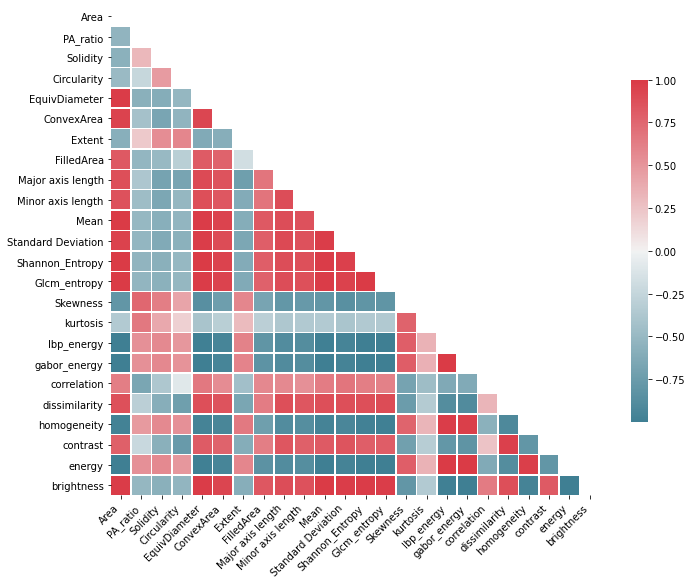

In [ ]:
corr = fm_X.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap = sns.diverging_palette(20, 220, n=400)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig(r"C:\Users\DCL\OneDrive\Documents\blood cell\ex 1\corr.png")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(fm_X, fm_y, test_size=0.33, random_state=101)

In [ ]:
#X_train = 5247
#X_test = 2585

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100) # Define classifier
rf.fit(X_train, y_train) # Train model



y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
#rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
#rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
prec = precision_score(y_test, y_test_pred,average='weighted')
rec = recall_score(y_test, y_test_pred,average='weighted')

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
#print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
#print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)
print('- precision: %s' % prec)
print('- recall: %s' % rec)

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

labels = [0, 1, 2, 3]

ytest = label_binarize(y_test, classes=labels)
ypreds = label_binarize(y_test_pred, classes=labels)

roc = roc_auc_score(ytest, ypreds,average='macro',multi_class='ovo')
print (roc)

results = pd.DataFrame([['Random Forest',rf_train_accuracy, rf_test_accuracy,prec,rec, rf_test_f1,roc]],
                             columns = ['Model', 'training Accuracy','test accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

#results = results.append(model_results, ignore_index = True)
results


Model performance for Training set
- Accuracy: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 0.8581818181818182
- F1 score: 0.855747602817092
- precision: 0.8572278027522354
- recall: 0.8581818181818182
0.9076061625258918


,Model,training Accuracy,test accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,1.0,0.858182,0.857228,0.858182,0.855748,0.907606


In [ ]:
#from sklearn.ensemble import LogisticRegression

lr = LogisticRegression(random_state = 0) # Define classifier
lr.fit(X_train, y_train) # Train model



y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
#rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
#rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
prec = precision_score(y_test, y_test_pred,average='weighted')
rec = recall_score(y_test, y_test_pred,average='weighted')

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
#print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
#print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)
print('- precision: %s' % prec)
print('- recall: %s' % rec)

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

labels = [0, 1, 2, 3]

ytest = label_binarize(y_test, classes=labels)
ypreds = label_binarize(y_test_pred, classes=labels)

roc = roc_auc_score(ytest, ypreds,average='macro',multi_class='ovo')
print (roc)

model_results = pd.DataFrame([['LogisticRegression',rf_train_accuracy, rf_test_accuracy,prec,rec, rf_test_f1,roc]],
                             columns = ['Model', 'training Accuracy','test accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(model_results, ignore_index = True)
results

Model performance for Training set
- Accuracy: 0.826186392224128
- F1 score: 0.8260926838667562
----------------------------------
Model performance for Test set
- Accuracy: 0.8278529980657641
- F1 score: 0.8282160451657349
- precision: 0.8308711458191137
- recall: 0.8278529980657641
0.8869880723420628


,Model,training Accuracy,test accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,1.000000,0.969826,0.970312,0.969826,0.969928,0.980563
1,LogisticRegression,0.826186,0.827853,0.830871,0.827853,0.828216,0.886988


In [ ]:
#from sklearn.ensemble import LogisticRegression

ad = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
    n_estimators=100) # Define classifier

ad.fit(X_train, y_train) # Train model



y_train_pred = ad.predict(X_train)
y_test_pred = ad.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
#rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
#rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
prec = precision_score(y_test, y_test_pred,average='weighted')
rec = recall_score(y_test, y_test_pred,average='weighted')

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
#print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
#print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)
print('- precision: %s' % prec)
print('- recall: %s' % rec)

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

labels = [0, 1, 2, 3]

ytest = label_binarize(y_test, classes=labels)
ypreds = label_binarize(y_test_pred, classes=labels)

roc = roc_auc_score(ytest, ypreds,average='macro',multi_class='ovo')
print (roc)

model_results = pd.DataFrame([['AdaBoost',rf_train_accuracy, rf_test_accuracy,prec,rec, rf_test_f1,roc]],
                             columns = ['Model', 'training Accuracy','test accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(model_results, ignore_index = True)
results


Model performance for Training set
- Accuracy: 0.8479130931961121
- F1 score: 0.8471593991971759
----------------------------------
Model performance for Test set
- Accuracy: 0.8270793036750483
- F1 score: 0.8265919198515187
- precision: 0.8268231081435599
- recall: 0.8270793036750483
0.8890313182125238


,Model,training Accuracy,test accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,1.000000,0.969826,0.970312,0.969826,0.969928,0.980563
1,LogisticRegression,0.826186,0.827853,0.830871,0.827853,0.828216,0.886988
2,AdaBoost,0.847913,0.827079,0.826823,0.827079,0.826592,0.889031


In [ ]:
#from sklearn.ensemble import LogisticRegression

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)



y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
#rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
#rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
prec = precision_score(y_test, y_test_pred,average='weighted')
rec = recall_score(y_test, y_test_pred,average='weighted')

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
#print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
#print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)
print('- precision: %s' % prec)
print('- recall: %s' % rec)

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

labels = [0, 1, 2, 3]

ytest = label_binarize(y_test, classes=labels)
ypreds = label_binarize(y_test_pred, classes=labels)

roc = roc_auc_score(ytest, ypreds,average='macro',multi_class='ovo')
print (roc)

model_results = pd.DataFrame([['MLP',rf_train_accuracy, rf_test_accuracy,prec,rec, rf_test_f1,roc]],
                             columns = ['Model', 'training Accuracy','test accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(model_results, ignore_index = True)
results


Model performance for Training set
- Accuracy: 0.8869830379264342
- F1 score: 0.886844999756123
----------------------------------
Model performance for Test set
- Accuracy: 0.8796905222437137
- F1 score: 0.8799087091688154
- precision: 0.8802686890174951
- recall: 0.8796905222437137
0.9219330722177271


,Model,training Accuracy,test accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,1.000000,0.969826,0.970312,0.969826,0.969928,0.980563
1,LogisticRegression,0.826186,0.827853,0.830871,0.827853,0.828216,0.886988
2,AdaBoost,0.847913,0.827079,0.826823,0.827079,0.826592,0.889031
3,MLP,0.886983,0.879691,0.880269,0.879691,0.879909,0.921933


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
DT = DecisionTreeClassifier(random_state=42)

DT.fit(X_train, y_train)



y_train_pred = DT.predict(X_train)
y_test_pred = DT.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
#rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
#rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
prec = precision_score(y_test, y_test_pred,average='weighted')
rec = recall_score(y_test, y_test_pred,average='weighted')

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
#print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
#print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)
print('- precision: %s' % prec)
print('- recall: %s' % rec)

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

labels = [0, 1, 2, 3]

ytest = label_binarize(y_test, classes=labels)
ypreds = label_binarize(y_test_pred, classes=labels)

roc = roc_auc_score(ytest, ypreds,average='macro',multi_class='ovo')
print (roc)

model_results = pd.DataFrame([['Decision tree',rf_train_accuracy, rf_test_accuracy,prec,rec, rf_test_f1,roc]],
                             columns = ['Model', 'training Accuracy','test accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(model_results, ignore_index = True)
results


Model performance for Training set
- Accuracy: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 0.9090909090909091
- F1 score: 0.9086098190403329
- precision: 0.9085690855178521
- recall: 0.9090909090909091
0.9417163831620361


,Model,training Accuracy,test accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,1.000000,0.969826,0.970312,0.969826,0.969928,0.980563
1,LogisticRegression,0.826186,0.827853,0.830871,0.827853,0.828216,0.886988
2,AdaBoost,0.847913,0.827079,0.826823,0.827079,0.826592,0.889031
3,MLP,0.886983,0.879691,0.880269,0.879691,0.879909,0.921933
4,Decision tree,1.000000,0.909091,0.908569,0.909091,0.908610,0.941716


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(n_estimators=100, random_state=42)

GB.fit(X_train, y_train)



y_train_pred = GB.predict(X_train)
y_test_pred = GB.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
#rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
#rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
prec = precision_score(y_test, y_test_pred,average='weighted')
rec = recall_score(y_test, y_test_pred,average='weighted')

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
#print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
#print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)
print('- precision: %s' % prec)
print('- recall: %s' % rec)

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

labels = [0, 1, 2, 3]

ytest = label_binarize(y_test, classes=labels)
ypreds = label_binarize(y_test_pred, classes=labels)

roc = roc_auc_score(ytest, ypreds,average='macro',multi_class='ovo')
print (roc)

model_results = pd.DataFrame([['GradientBoosting',rf_train_accuracy, rf_test_accuracy,prec,rec, rf_test_f1,roc]],
                             columns = ['Model', 'training Accuracy','test accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(model_results, ignore_index = True)
results

Model performance for Training set
- Accuracy: 0.9668381932532876
- F1 score: 0.9668248715497346
----------------------------------
Model performance for Test set
- Accuracy: 0.9346228239845261
- F1 score: 0.9346269297188021
- precision: 0.9347160719963366
- recall: 0.9346228239845261
0.9581458825409013


,Model,training Accuracy,test accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,1.000000,0.969826,0.970312,0.969826,0.969928,0.980563
1,LogisticRegression,0.826186,0.827853,0.830871,0.827853,0.828216,0.886988
2,AdaBoost,0.847913,0.827079,0.826823,0.827079,0.826592,0.889031
3,MLP,0.886983,0.879691,0.880269,0.879691,0.879909,0.921933
4,Decision tree,1.000000,0.909091,0.908569,0.909091,0.908610,0.941716
5,GradientBoosting,0.966838,0.934623,0.934716,0.934623,0.934627,0.958146


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)



y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
#rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
#rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
prec = precision_score(y_test, y_test_pred,average='weighted')
rec = recall_score(y_test, y_test_pred,average='weighted')

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
#print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
#print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)
print('- precision: %s' % prec)
print('- recall: %s' % rec)

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

labels = [0, 1, 2, 3]

ytest = label_binarize(y_test, classes=labels)
ypreds = label_binarize(y_test_pred, classes=labels)

roc = roc_auc_score(ytest, ypreds,average='macro',multi_class='ovo')
print (roc)

model_results = pd.DataFrame([['KNN',rf_train_accuracy, rf_test_accuracy,prec,rec, rf_test_f1,roc]],
                             columns = ['Model', 'training Accuracy','test accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(model_results, ignore_index = True)
results

Model performance for Training set
- Accuracy: 0.9813936519518424
- F1 score: 0.9813953008499819
----------------------------------
Model performance for Test set
- Accuracy: 0.9659574468085106
- F1 score: 0.9660046421686571
- precision: 0.96608322405371
- recall: 0.9659574468085106
0.9779270980798057


,Model,training Accuracy,test accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,1.000000,0.966809,0.967168,0.966809,0.966916,0.978685
1,KNN,0.981394,0.965957,0.966083,0.965957,0.966005,0.977927


In [ ]:
from sklearn.svm import SVC

# instantiate classifier with default hyperparameters
svc=SVC()
svc.fit(X_train, y_train)



y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
#rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
#rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
prec = precision_score(y_test, y_test_pred,average='weighted')
rec = recall_score(y_test, y_test_pred,average='weighted')

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
#print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
#print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)
print('- precision: %s' % prec)
print('- recall: %s' % rec)

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

labels = [0, 1, 2, 3]

ytest = label_binarize(y_test, classes=labels)
ypreds = label_binarize(y_test_pred, classes=labels)

roc = roc_auc_score(ytest, ypreds,average='macro',multi_class='ovo')
print (roc)

model_results = pd.DataFrame([['SVM',rf_train_accuracy, rf_test_accuracy,prec,rec, rf_test_f1,roc]],
                             columns = ['Model', 'training Accuracy','test accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(model_results, ignore_index = True)
results

Model performance for Training set
- Accuracy: 0.8793596340766152
- F1 score: 0.8791118539672457
----------------------------------
Model performance for Test set
- Accuracy: 0.8808510638297873
- F1 score: 0.8805461573955696
- precision: 0.8808588610816447
- recall: 0.8808510638297873
0.9234101484110755


,Model,training Accuracy,test accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,1.000000,0.969826,0.970312,0.969826,0.969928,0.980563
1,LogisticRegression,0.826186,0.827853,0.830871,0.827853,0.828216,0.886988
2,AdaBoost,0.847913,0.827079,0.826823,0.827079,0.826592,0.889031
3,MLP,0.886983,0.879691,0.880269,0.879691,0.879909,0.921933
4,Decision tree,1.000000,0.909091,0.908569,0.909091,0.908610,0.941716
5,GradientBoosting,0.966838,0.934623,0.934716,0.934623,0.934627,0.958146
6,KNN,0.979226,0.964023,0.964165,0.964023,0.964068,0.976646
7,SVM,0.879360,0.880851,0.880859,0.880851,0.880546,0.923410


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)



y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
#rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
#rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
prec = precision_score(y_test, y_test_pred,average='weighted')
rec = recall_score(y_test, y_test_pred,average='weighted')

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
#print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
#print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)
print('- precision: %s' % prec)
print('- recall: %s' % rec)

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

labels = [0, 1, 2, 3]

ytest = label_binarize(y_test, classes=labels)
ypreds = label_binarize(y_test_pred, classes=labels)

roc = roc_auc_score(ytest, ypreds,average='macro',multi_class='ovo')
print (roc)

model_results = pd.DataFrame([['naive_bayes',rf_train_accuracy, rf_test_accuracy,prec,rec, rf_test_f1,roc]],
                             columns = ['Model', 'training Accuracy','test accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(model_results, ignore_index = True)
results

Model performance for Training set
- Accuracy: 0.5023823137030684
- F1 score: 0.44081495339295107
----------------------------------
Model performance for Test set
- Accuracy: 0.49941972920696326
- F1 score: 0.44027795640434214
- precision: 0.5934146069194124
- recall: 0.49941972920696326
0.6830133741919691


,Model,training Accuracy,test accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,1.000000,0.969826,0.970312,0.969826,0.969928,0.980563
1,LogisticRegression,0.826186,0.827853,0.830871,0.827853,0.828216,0.886988
2,AdaBoost,0.847913,0.827079,0.826823,0.827079,0.826592,0.889031
3,MLP,0.886983,0.879691,0.880269,0.879691,0.879909,0.921933
4,Decision tree,1.000000,0.909091,0.908569,0.909091,0.908610,0.941716
5,GradientBoosting,0.966838,0.934623,0.934716,0.934623,0.934627,0.958146
6,KNN,0.979226,0.964023,0.964165,0.964023,0.964068,0.976646
7,SVM,0.879360,0.880851,0.880859,0.880851,0.880546,0.923410
8,naive_bayes,0.502382,0.499420,0.593415,0.499420,0.440278,0.683013


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)

xgb.fit(X_train, y_train)



y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
#rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
#rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
prec = precision_score(y_test, y_test_pred,average='weighted')
rec = recall_score(y_test, y_test_pred,average='weighted')

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
#print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
#print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)
print('- precision: %s' % prec)
print('- recall: %s' % rec)

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

labels = [0, 1, 2, 3]

ytest = label_binarize(y_test, classes=labels)
ypreds = label_binarize(y_test_pred, classes=labels)

roc = roc_auc_score(ytest, ypreds,average='macro',multi_class='ovo')
print (roc)

model_results = pd.DataFrame([['xgb',rf_train_accuracy, rf_test_accuracy,prec,rec, rf_test_f1,roc]],
                             columns = ['Model', 'training Accuracy','test accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(model_results, ignore_index = True)
results


Model performance for Training set
- Accuracy: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 0.9693617021276596
- F1 score: 0.9694017783130245
- precision: 0.969492649248458
- recall: 0.9693617021276596
0.9802415669405486


,Model,training Accuracy,test accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,1.000000,0.966809,0.967168,0.966809,0.966916,0.978685
1,KNN,0.981394,0.965957,0.966083,0.965957,0.966005,0.977927
2,xgb,1.000000,0.969362,0.969493,0.969362,0.969402,0.980242


In [ ]:
a = r"C:\Users\DCL\OneDrive\Documents\blood cell\original model.csv"
results.to_csv(a,index=False)### give train.csv path

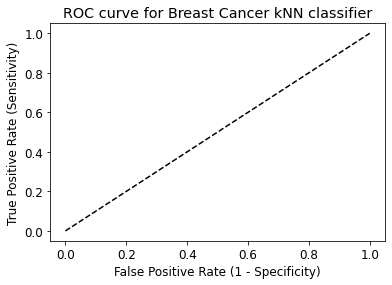

In [ ]:
#ROC

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred, pos_label=4)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Breast Cancer kNN classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#voting

#logistic = RandomForestClassifier()
#knearest = KNeighborsClassifier(n_neighbors = 6)
#knearest = XGBClassifier(n_estimators=100)
voting = VotingClassifier(estimators = [('mlp',knn), ('rf',rf),], voting = 'soft')

voting.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
#rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
#rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
prec = precision_score(y_test, y_test_pred,average='weighted')
rec = recall_score(y_test, y_test_pred,average='weighted')

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
#print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
#print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)
print('- precision: %s' % prec)
print('- recall: %s' % rec)

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

labels = [0, 1, 2, 3]

ytest = label_binarize(y_test, classes=labels)
ypreds = label_binarize(y_test_pred, classes=labels)

roc = roc_auc_score(ytest, ypreds,average='macro',multi_class='ovo')
print (roc)

results = pd.DataFrame([['RF + KNN',rf_train_accuracy, rf_test_accuracy,prec,rec, rf_test_f1,roc]],
                             columns = ['Model', 'training Accuracy','test accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

#results = results.append(model_results, ignore_index = True)
results

Model performance for Training set
- Accuracy: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 0.9690522243713733
- F1 score: 0.969123842807324
- precision: 0.9692914833845651
- recall: 0.9690522243713733
0.9800337476559134


,Model,training Accuracy,test accuracy,Precision,Recall,F1 Score,ROC
0,RF + KNN,1.0,0.969052,0.969291,0.969052,0.969124,0.980034


In [ ]:
a = r"C:\Users\DCL\OneDrive\Documents\blood cell\voting.csv"
results.to_csv(a,index=False)### give train.csv path

In [ ]:
#stacking
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('mlp',xgb),
    #('rf',rf),
    ('KNN',knn)
    #('GB',GB),
    #('DT',DT)

]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=RandomForestClassifier()
)

# Train stacked model
stack_model.fit(X_train, y_train)




# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
#stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
#stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
#print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
#print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)


from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

labels = [0, 1, 2, 3]

ytest = label_binarize(y_test, classes=labels)
ypreds = label_binarize(y_test_pred, classes=labels)

print (roc_auc_score(ytest, ypreds,average='macro',multi_class='ovo'))


Model performance for Training set
- Accuracy: 0.998723093761401
- F1 score: 0.998723306531147
----------------------------------
Model performance for Test set
- Accuracy: 0.9676595744680851
- F1 score: 0.9676995913515603
0.9791865233568506


Confusion matrix

 [[661   1   1  29]
 [  2 542   2   2]
 [  4   2 497   4]
 [ 22   1   0 580]]

True Positives(TP) =  661

True Negatives(TN) =  542

False Positives(FP) =  1

False Negatives(FN) =  2


<AxesSubplot:>

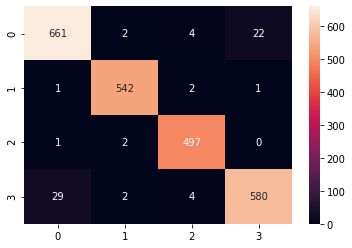

In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

cm = confusion_matrix(y_test_pred, y_test)
sns.heatmap(cm, annot = True, fmt = 'd')

In [ ]:
#FPR, specificity

false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

False Positive Rate : 0.0000
Specificity : 1.0000


In [ ]:
#feature selection

In [ ]:
#Univariate Method - SelectKBest

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X_train, y_train)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train.columns)

f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Specs','Score']

In [ ]:
f_Scores

,Specs,Score
0,Area,1.059869e+06
1,PA_ratio,2.926431e+00
2,Solidity,1.740321e+01
3,Circularity,9.953414e+01
4,EquivDiameter,5.107054e+03
5,ConvexArea,2.895904e+06
6,Extent,1.802452e+01
7,FilledArea,5.553004e+04
8,Major axis length,1.264299e+04
9,Minor axis length,5.492283e+03


In [ ]:
print(f_Scores.nlargest(20,'Score'))

                 Specs         Score
5           ConvexArea  2.895904e+06
0                 Area  1.059869e+06
7           FilledArea  5.553004e+04
8    Major axis length  1.264299e+04
21            contrast  1.020739e+04
15            kurtosis  9.472872e+03
9    Minor axis length  5.492283e+03
4        EquivDiameter  5.107054e+03
11  Standard Deviation  3.837561e+03
10                Mean  2.869379e+03
23          brightness  2.661584e+03
13        Glcm_entropy  2.210160e+03
14            Skewness  4.848097e+02
12     Shannon_Entropy  1.390703e+02
3          Circularity  9.953414e+01
19       dissimilarity  9.287046e+01
6               Extent  1.802452e+01
2             Solidity  1.740321e+01
1             PA_ratio  2.926431e+00
17        gabor_energy  2.591226e+00


In [ ]:
#Feature Importance

import xgboost
import matplotlib.pyplot as plt

#model = xgboost.XGBClassifier()
#model.fit(X_train, y_train)

import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X_train, y_train)
a = model.feature_importances_
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
f_scores = pd.DataFrame(a)
df_columns = pd.DataFrame(X_train.columns)

f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Specs','Score']


[0.02164905 0.04868761 0.03998912 0.06962791 0.01971026 0.03244308
 0.11648845 0.11316572 0.03240759 0.02036911 0.03130792 0.04121484
 0.02771127 0.03526017 0.02411267 0.03013014 0.03153381 0.02082749
 0.05419927 0.04208988 0.06173497 0.03199248 0.02194079 0.03140639]


ValueError: Length mismatch: Expected axis has 25 elements, new values have 2 elements

In [ ]:
df_scores = pd.DataFrame(a)
df_columns = pd.DataFrame(X_train.columns)

f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Specs','Score']

In [ ]:
f_Scores

,Specs,Score
0,Area,0.030589
1,PA_ratio,0.041547
2,Solidity,0.034770
3,Circularity,0.068435
4,EquivDiameter,0.030122
5,ConvexArea,0.035089
6,Extent,0.072941
7,FilledArea,0.089591
8,Major axis length,0.026462
9,Minor axis length,0.028236


In [ ]:
print(f_Scores.nlargest(20,'Score'))

                 Specs     Score
7           FilledArea  0.089591
6               Extent  0.072941
3          Circularity  0.068435
20         homogeneity  0.067271
11  Standard Deviation  0.044929
18         correlation  0.041618
1             PA_ratio  0.041547
13        Glcm_entropy  0.040475
23          brightness  0.040186
10                Mean  0.039185
19       dissimilarity  0.039027
12     Shannon_Entropy  0.036330
5           ConvexArea  0.035089
21            contrast  0.034845
2             Solidity  0.034770
15            kurtosis  0.033713
14            Skewness  0.033224
16          lbp_energy  0.031407
0                 Area  0.030589
17        gabor_energy  0.030270


In [ ]:
#Univariate Method - Select percentile

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
#X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)

BestFeatures = SelectPercentile(score_func=chi2, percentile=10)
fit = BestFeatures.fit(X_train, y_train)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train.columns)

f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Specs','Score']

In [ ]:
f_Scores

,Specs,Score
0,Area,1.059869e+06
1,PA_ratio,2.926431e+00
2,Solidity,1.740321e+01
3,Circularity,9.953414e+01
4,EquivDiameter,5.107054e+03
5,ConvexArea,2.895904e+06
6,Extent,1.802452e+01
7,FilledArea,5.553004e+04
8,Major axis length,1.264299e+04
9,Minor axis length,5.492283e+03


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
rf.score(X_test,y_test), rf.score(X_train,y_train)

(0.8174371327210471, 0.9694325993309725)

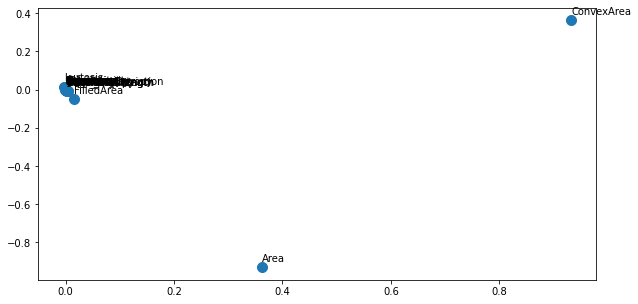

In [ ]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(X_train)
v = pd.DataFrame(pca.components_)
text = featuress

plt.figure(figsize=(10,5))
# plotting scatter plot
plt.scatter(v.loc[0,:], v.loc[1,:], s=100)

# Loop for annotation of all points
for i in range(22):
    plt.annotate(text[i], (v.loc[0,i], v.loc[1,i] + 0.03), fontsize=10)

In [ ]:
col_list = a["Specs"].values.tolist()
print(col_list)

['FilledArea', 'Area', 'kurtosis', 'ConvexArea', 'EquivDiameter', 'Major axis length', 'Minor axis length', 'Skewness', 'contrast', 'Standard Deviation', 'Circularity', 'lbp_energy', 'gabor_energy', 'energy', 'homogeneity', 'Solidity', 'correlation', 'Glcm_entropy', 'Extent', 'PA_ratio']


In [ ]:
r = RandomForestClassifier(random_state = 42)
r.fit(X_train, y_train)
importances = r.feature_importances_
std = np.std([tree.feature_importances_ for tree in r.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

print("Feature ranking: ")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" %(f + 1, indices[f], importances[indices[f]]))

Feature ranking: 
1. feature 7 (0.121240)
2. feature 6 (0.102903)
3. feature 3 (0.075640)
4. feature 20 (0.067939)
5. feature 18 (0.049345)
6. feature 13 (0.047785)
7. feature 1 (0.046451)
8. feature 19 (0.042859)
9. feature 11 (0.039757)
10. feature 2 (0.038858)
11. feature 5 (0.035242)
12. feature 12 (0.030808)
13. feature 8 (0.030143)
14. feature 21 (0.029989)
15. feature 23 (0.029179)
16. feature 15 (0.029060)
17. feature 10 (0.028552)
18. feature 14 (0.025522)
19. feature 22 (0.025265)
20. feature 16 (0.023340)
21. feature 0 (0.022064)
22. feature 17 (0.019734)
23. feature 4 (0.019321)
24. feature 9 (0.019004)


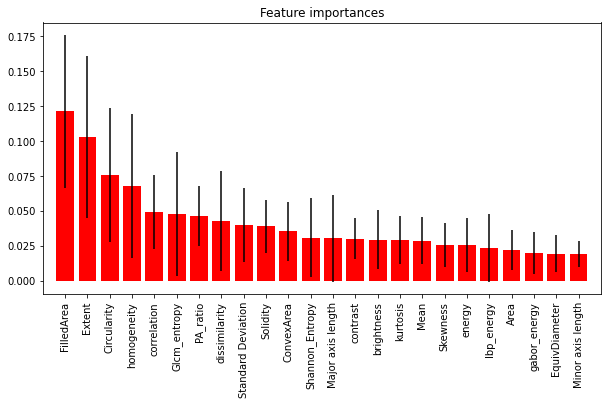

In [ ]:
plt.figure(figsize = (10, 5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color = "r", yerr = std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
new_features = merged2.iloc[:, list(indices)[:19]]
print("Number of features above 5%: ", len(new_features.columns))
list(new_features.columns)

Number of features above 5%:  19


['FilledArea',
 'Extent',
 'Circularity',
 'homogeneity',
 'correlation',
 'Glcm_entropy',
 'PA_ratio',
 'dissimilarity',
 'Standard Deviation',
 'Solidity',
 'ConvexArea',
 'Shannon_Entropy',
 'Major axis length',
 'contrast',
 'brightness',
 'kurtosis',
 'Mean',
 'Skewness',
 'energy']

Text(0, 0.5, 'Explained variance ratio')

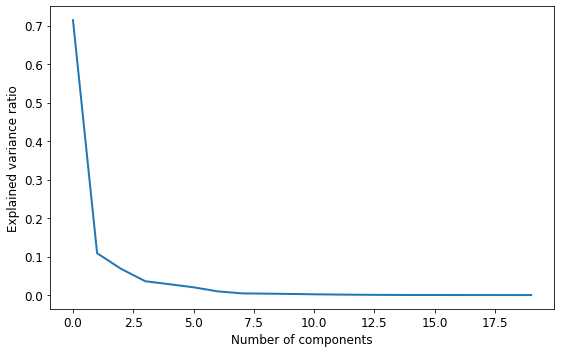

In [ ]:
pca = PCA()
pca.fit(X_train)

plt.figure(figsize = (10, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth = 2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')

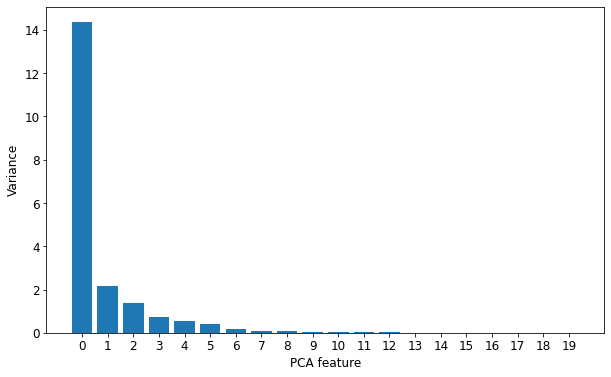

In [ ]:
pca = PCA()

pca.fit(X_train)
# Plot the explained variances
features = range(pca.n_components_)
plt.figure(figsize = (10, 6))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()